# Reading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression

import os

In [2]:
os.getcwd()

'/Users/elijahcurme/Desktop/GA/dsi-assignments/project_2/code'

In [3]:
os.listdir('.')

['.DS_Store', 'p2main.ipynb', '.ipynb_checkpoints']

In [4]:
train = pd.read_csv('../dsi-us-10-project-2-regression-challenge/train.csv')
test = pd.read_csv('../dsi-us-10-project-2-regression-challenge/test.csv')

In [5]:
train.shape

(2051, 81)

In [6]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
#df.head().transpose()
pd.set_option('display.max_columns',100)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Cleaning

## Train

### Mapping Categoricals

**Many ordinal columns use this quality scale**

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor

In [8]:
#Common ordinal scale
qual_dict = {
    'Po' : 1,
    'Fa' : 2,
    'TA' : 3,
    'Gd' : 4,
    'Ex' : 5
}

In [9]:
#Ordinals with unique scales
ordinal_dict = {
    'Lot Shape' : {'IR3' : 4, 'IR2' : 3, 'IR1' : 2, 'REG' : 1},
    'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa' : 2, 'ELO' : 1},
    'Land Slope' : {'Gtl' : 3, 'Mod' : 2, 'Sev' : 1},
    'Bsmt Exposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1},
    'BsmtFin Type 1' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1},
    'BsmtFin Type 2' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1},
    'Electrical' : {'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
    'Functional' : {'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1},
    'Garage Finish' : {'Fin' : 3, 'RFn' : 2, 'Unf' : 1},
    'Paved Drive' : {'Y' : 3, 'P' : 2, 'N' : 1},
    'Fence' : {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1}
}

In [10]:
#Unique ordinals with nulls (Lot shape has nulls after mapping)
for column in [
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Finish', 'Fence'
]:
    num_missing = train[column].isnull().sum()
    print('Column {} missing {}.'.format(column, num_missing))

Column Bsmt Exposure missing 58.
Column BsmtFin Type 1 missing 55.
Column BsmtFin Type 2 missing 56.
Column Garage Finish missing 114.
Column Fence missing 1651.


In [11]:
def map_dict(cols):
    for col in cols:
        train[col] = train[col].map(ordinal_dict[col])

In [12]:
#Map unique ordinals
ordinallist = ['Lot Shape',
    'Utilities',
    'Land Slope',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Electrical',
    'Functional',
    'Garage Finish',
    'Paved Drive',
    'Fence']

map_dict(ordinallist)

In [13]:
#Map common ordinals

ordinal_cols = ['Exter Qual',
      'Exter Cond',
      'Bsmt Qual',
      'Bsmt Cond',
      'Heating QC',
      'Kitchen Qual',
      'Fireplace Qu',
      'Garage Qual',
      'Garage Cond',
      'Pool QC']

train[ordinal_cols] = train[ordinal_cols].stack().map(qual_dict).unstack()

### Fill nulls with 0s

In [14]:
#Unique

fill_unique_cols = [
    'Lot Shape',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Garage Finish',
    'Fence',
]

train[fill_unique_cols] = train[fill_unique_cols].fillna(value = 0)

In [15]:
#Common
fill_common_cols = ['Bsmt Qual', 
    'Bsmt Cond', 
    'Fireplace Qu', 
    'Garage Qual',
    'Garage Cond',
    'Pool QC']
train[fill_common_cols] = train[fill_common_cols].fillna(value=0)

### Cast types

In [16]:
#Unique
train[fill_unique_cols] = train[fill_unique_cols].astype('int64')

In [17]:
#Common
train[ordinal_cols] = train[ordinal_cols].astype('int64')

In [18]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,2,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,2,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,0,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,0,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,2,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,NaN,0,3,2010,WD,138500


## Test

In [19]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Mapping

In [20]:
def map_dict_test(cols):
    for col in cols:
        test[col] = test[col].map(ordinal_dict[col])

In [21]:
#Map unique ordinals for test
ordinallisttest = test[['Lot Shape',
    'Utilities',
    'Land Slope',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Electrical',
    'Functional',
    'Garage Finish',
    'Paved Drive',
    'Fence']]

map_dict_test(ordinallisttest)

In [22]:
#Map common ordinals for test
test[ordinal_cols] = test[ordinal_cols].stack().map(qual_dict).unstack()

### Fill nulls

In [23]:
#Unique for test
test[fill_unique_cols] = test[fill_unique_cols].fillna(value = 0)

In [24]:
#Common for test
test[fill_common_cols] = test[fill_common_cols].fillna(value=0)

In [25]:
#Filling numerical nulls. Needed for ['Total Bsmt SF', 'Garage Area','Garage Cars']
train.interpolate(method = 'linear', limit_direction='forward', inplace = True)
train.interpolate(method = 'linear', limit_direction='backward', inplace = True)

test.interpolate(method = 'linear', limit_direction='forward', inplace = True)
test.interpolate(method = 'linear', limit_direction='backward', inplace = True)

### Cast types

In [26]:
#Unique test
test[fill_unique_cols] = test[fill_unique_cols].astype('int64')

In [27]:
#Common test
test[ordinal_cols] = test[ordinal_cols].astype('int64')

# EDA

### This EDA comes before dummies because dummy creation deletes the original column

In [28]:
train['MS Zoning'].isnull().sum()

0

In [29]:
train['Sale Type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

In [30]:
price_groupby_cols = [
    'Foundation',
    'Lot Config',
    'Condition 1',
    'Bldg Type',
    'MS SubClass',
    'House Style',
    'Sale Type',
    'MS Zoning',
    'Yr Sold',
    'Neighborhood'
]

for col in price_groupby_cols:
    display(train[[col, 'SalePrice']].groupby([col]).mean())

,SalePrice
Foundation,
BrkTil,129050.190045
CBlock,148415.530707
PConc,227676.483801
Slab,108810.676471
Stone,143235.200000
Wood,173750.000000


,SalePrice
Lot Config,
Corner,180629.591954
CulDSac,230744.358779
FR2,174703.600000
FR3,198600.000000
Inside,177537.014637


,SalePrice
Condition 1,
Artery,128765.000000
Feedr,143223.605505
Norm,185007.310130
PosA,254733.333333
PosN,254794.296296
RRAe,139685.714286
RRAn,172604.777778
RRNe,129616.666667
RRNn,198208.333333


,SalePrice
Bldg Type,
1Fam,185275.685882
2fmCon,123179.891304
Duplex,139296.333333
Twnhs,133100.000000
TwnhsE,198312.372671


,SalePrice
MS SubClass,
20,189305.488312
30,94936.346535
40,119125.000000
45,116372.727273
50,137270.000000
60,239225.769036
70,153354.455556
75,204875.000000
80,169569.825581


,SalePrice
House Style,
1.5Fin,136480.091743
1.5Unf,112466.666667
1Story,179809.194523
2.5Fin,243666.666667
2.5Unf,191785.714286
2Story,206408.963211
SFoyer,149343.920000
SLvl,166248.989362


,SalePrice
Sale Type,
COD,133574.523810
CWD,186635.000000
Con,241807.500000
ConLD,129091.352941
ConLI,207992.857143
ConLw,124600.000000
New,279021.056250
Oth,127497.750000
WD,174912.251544


,SalePrice
MS Zoning,
A (agr),47300.000000
C (all),78010.894737
FV,218618.316832
I (all),57625.000000
RH,148859.571429
RL,191235.164581
RM,129119.142405


,SalePrice
Yr Sold,
2006,179471.609589
2007,185524.514056
2008,181750.372414
2009,182455.244395
2010,174180.059829


,SalePrice
Neighborhood,
Blmngtn,200417.681818
Blueste,144566.666667
BrDale,103371.052632
BrkSide,127022.697368
ClearCr,217490.074074
CollgCr,202497.216667
Crawfor,205901.211268
Edwards,130493.468531
Gilbert,189228.387931


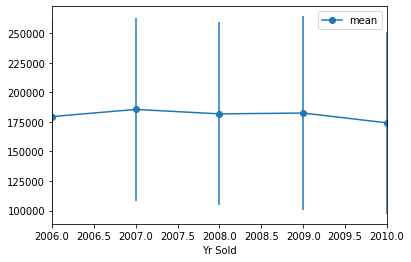

In [31]:
train.groupby('Yr Sold')['SalePrice'].agg(['std', 'mean']).plot(yerr='std', marker='o')

### Create dummies

In [32]:
#Custom dummies
# train['after1960'] = np.where(train['Year Built'] > 1960, 1, 0)
train['after1960'] = (train['Year Built'] > 1960).astype(int) #True = 1, False = 0
train['all_flrs_SF'] = train['Total Bsmt SF'] + train['Gr Liv Area']

In [33]:
# test['after1960'] = np.where(test['Year Built'] > 1960, 1, 0)
test['after1960'] = (test['Year Built'] > 1960).astype(int)
test['all_flrs_SF'] = test['Total Bsmt SF'] + test['Gr Liv Area']

In [34]:
#Auto dummies
dummy_cols = [
    'MS Zoning', 
    'House Style', 
    'Sale Type', 
    'MS SubClass', 
    'Foundation', 
    'Lot Config',
    'Condition 1',
    'Bldg Type',
    'Yr Sold']
train = pd.get_dummies(train, columns = dummy_cols, drop_first = True)
test = pd.get_dummies(test, columns = dummy_cols, drop_first = True)
train.head()

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
0,109,533352170,43.0,13517,Pave,NaN,2,Lvl,4,3,Sawyer,Norm,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,Pave,NaN,2,Lvl,4,3,SawyerW,Norm,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,153,535304180,68.0,7922,Pave,NaN,0,Lvl,4,3,NAmes,Norm,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,Pave,NaN,0,Lvl,4,3,Timber,Norm,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,Pave,NaN,2,Lvl,4,3,SawyerW,Norm,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
#Identify outliers
train[(train['all_flrs_SF'] > 10000) & (train['SalePrice'] < 200_000)]

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
960,1499,908154235,313.0,63887,Pave,NaN,4,Bnk,4,3,Edwards,Norm,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,5,Y,5,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1885,2181,908154195,128.0,39290,Pave,NaN,2,Bnk,4,3,Edwards,Norm,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,5,3,4,6,4010.0,1,0.0,1085.0,5095.0,GasA,5,Y,5,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [36]:
#Remove outliers
#581 uniquely causes scaled prediction in the negative 14 figures
train = train.drop([581, 960, 1885])

In [37]:
train['Functional'].value_counts()

8    1913
6      42
7      41
5      29
4      12
3       7
2       2
1       2
Name: Functional, dtype: int64

In [38]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
#pd.DataFrame(train.isnull().sum().head(100))

In [39]:
#5 Cheapest, 5 most expensive
display(train.sort_values(by = 'SalePrice').head())
display(train.sort_values(by = 'SalePrice', ascending = False).head())

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
1628,182,902207130,68.0,9656,Pave,NaN,0,Lvl,4,3,OldTown,Norm,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,2,1,1,0.0,1,0.0,678.0,678.0,GasA,3,N,5,832,0,0,832,0.0,0.0,1,0,2,1,3,5,8,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
183,1554,910251050,80.0,14584,Pave,NaN,0,Low,4,2,IDOTRR,Norm,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,2,1,0,0,0,0,0.0,0,0.0,0.0,0.0,Wall,1,N,4,733,0,0,733,0.0,0.0,1,0,2,1,2,4,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1309,727,902477120,60.0,7879,Pave,NaN,0,Lvl,4,3,IDOTRR,Norm,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,3,3,1,3,495.0,1,0.0,225.0,720.0,GasA,3,N,4,720,0,0,720,0.0,0.0,1,0,2,1,3,4,8,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1292,2844,909101330,60.0,8088,Pave,Grvl,0,Lvl,4,3,Edwards,Norm,2,3,1922,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,3,3,1,1,0.0,1,0.0,498.0,498.0,GasA,3,N,3,498,0,0,498,0.0,0.0,1,0,1,1,3,3,8,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1518,2881,911175430,50.0,9000,Pave,NaN,0,Lvl,4,3,IDOTRR,Norm,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,3,3,3,4,50.0,1,0.0,430.0,480.0,GasA,3,N,4,480,0,0,480,1.0,0.0,0,0,1,1,3,4,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Id,PID,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
1671,45,528150070,100.0,12919,Pave,NaN,2,Lvl,4,3,NridgHt,Norm,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,5,3,5,3,4,6,2188.0,1,0.0,142.0,2330.0,GasA,5,Y,5,2364,0,0,2364,1.0,0.0,2,1,2,1,5,11,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1964,1638,527216080,52.0,51974,Pave,NaN,2,Lvl,4,3,StoneBr,Norm,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,5,3,5,3,3,6,1101.0,1,0.0,1559.0,2660.0,GasA,5,Y,5,2338,0,0,2338,1.0,0.0,2,1,4,1,4,8,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1692,2451,528360050,114.0,17242,Pave,NaN,2,Lvl,4,3,NoRidge,Norm,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,4,4,5,3,4,3,292.0,6,1393.0,48.0,1733.0,GasA,5,Y,5,1933,1567,0,3500,1.0,0.0,3,1,4,1,5,11,8,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1796,434,528110090,107.0,13891,Pave,NaN,0,Lvl,4,3,NridgHt,Norm,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,5,3,5,3,4,1,0.0,1,0.0,1734.0,1734.0,GasA,5,Y,5,1734,1088,0,2822,0.0,0.0,3,1,4,1,5,12,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
151,2333,527212030,85.0,16056,Pave,NaN,2,Lvl,4,3,StoneBr,Norm,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,4,3,5,3,3,6,240.0,1,0.0,1752.0,1992.0,GasA,5,Y,5,1992,876,0,2868,0.0,0.0,3,1,4,1,5,11,8,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
train['SalePrice'].describe()

count      2048.000000
mean     181539.493652
std       79268.001933
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [41]:
train['all_flrs_SF'].describe()

count    2048.000000
mean     2549.883057
std       765.505936
min       334.000000
25%      2013.000000
50%      2457.000000
75%      2996.500000
max      6428.000000
Name: all_flrs_SF, dtype: float64

In [42]:
train['Year Remod/Add'].isnull().sum()

0

In [43]:
train[['after1960', 'SalePrice']].groupby(['after1960']).agg(['mean'])

,SalePrice
,mean
after1960,
0,132535.117898
1,207208.452381


In [44]:
#Highest correlations with sale price
pd.set_option('display.max_rows',100)
train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False).head(15)

,SalePrice
SalePrice,1.000000
all_flrs_SF,0.825615
Overall Qual,0.803376
Gr Liv Area,0.719165
Exter Qual,0.714648
Kitchen Qual,0.694219
Total Bsmt SF,0.664241
Garage Area,0.655200
Garage Cars,0.648292
1st Flr SF,0.648067


In [45]:
correlation_cols = [
    'Overall Qual',
    'Garage Cars',
    'Garage Area',
    'Exter Qual',
    'Bsmt Qual',
    'all_flrs_SF',
    'Kitchen Qual',
]

for col in correlation_cols:
    print(col, ': ', np.corrcoef(train['SalePrice'], train[col])[0][1])

Overall Qual :  0.8033755609748221
Garage Cars :  0.6482920967472714
Garage Area :  0.6552001600805792
Exter Qual :  0.7146477641669575
Bsmt Qual :  0.6128946657480556
all_flrs_SF :  0.8256152726175408
Kitchen Qual :  0.6942187582769225


## Visuals

In [46]:
plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = 12, 8

In [47]:
def line_of_best_fit(x, y):

    # Calculate the five "ingredients."
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    std_y = np.std(y)
    std_x = np.std(x)
    r_xy = np.corrcoef(x, y)[0][1]

    # Calculate the betas.
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - (beta_1 * x_bar)

    # Return line of best fit.
    return (beta_1, beta_0)

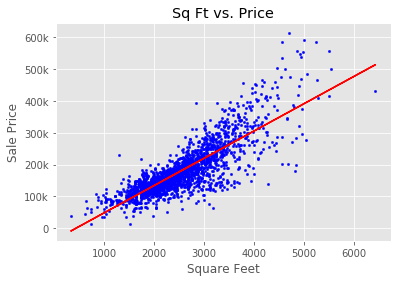

In [48]:
plt.scatter(train['all_flrs_SF'], train['SalePrice'], color = 'b', s=5)
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.title('Sq Ft vs. Price')
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], 
           ['0', '100k', '200k', '300k', '400k', '500k', '600k'])

m, b = line_of_best_fit(train['all_flrs_SF'],train['SalePrice'])
plt.plot(train['all_flrs_SF'], (m*train['all_flrs_SF'] + b), color = 'red');

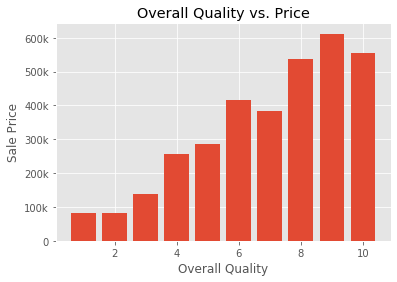

In [49]:
plt.bar(train['Overall Qual'], train['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Overall Quality vs. Price')
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], 
           ['0', '100k', '200k', '300k', '400k', '500k', '600k']);

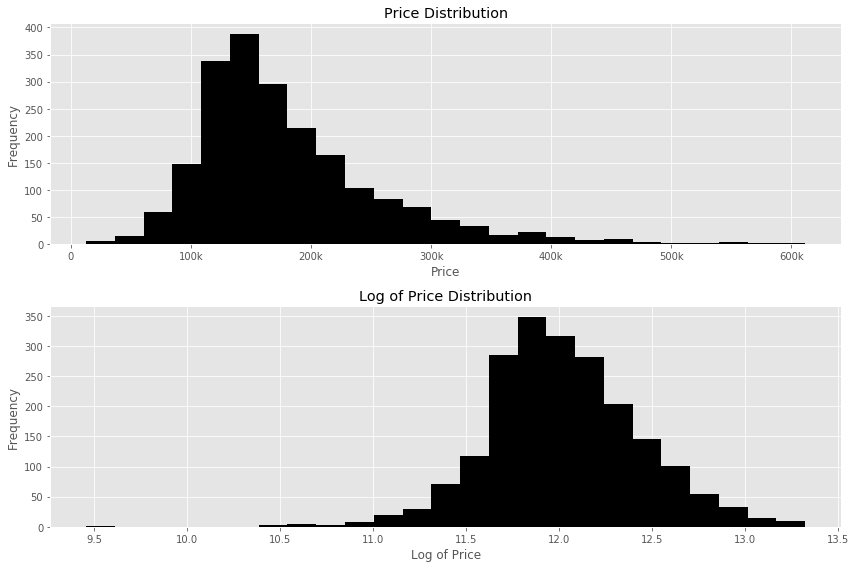

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].hist(train['SalePrice'], bins = 25, color = 'black')
ax[0].set_title('Price Distribution')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000])
ax[0].set_xticklabels(['0', '100k', '200k', '300k', '400k', '500k', '600k'])

ax[1].hist(np.log(train['SalePrice']), bins = 25, color = 'black')
ax[1].set_title('Log of Price Distribution')
ax[1].set_xlabel('Log of Price')
ax[1].set_ylabel('Frequency')

plt.tight_layout();
plt.savefig('../plots/dist.png')

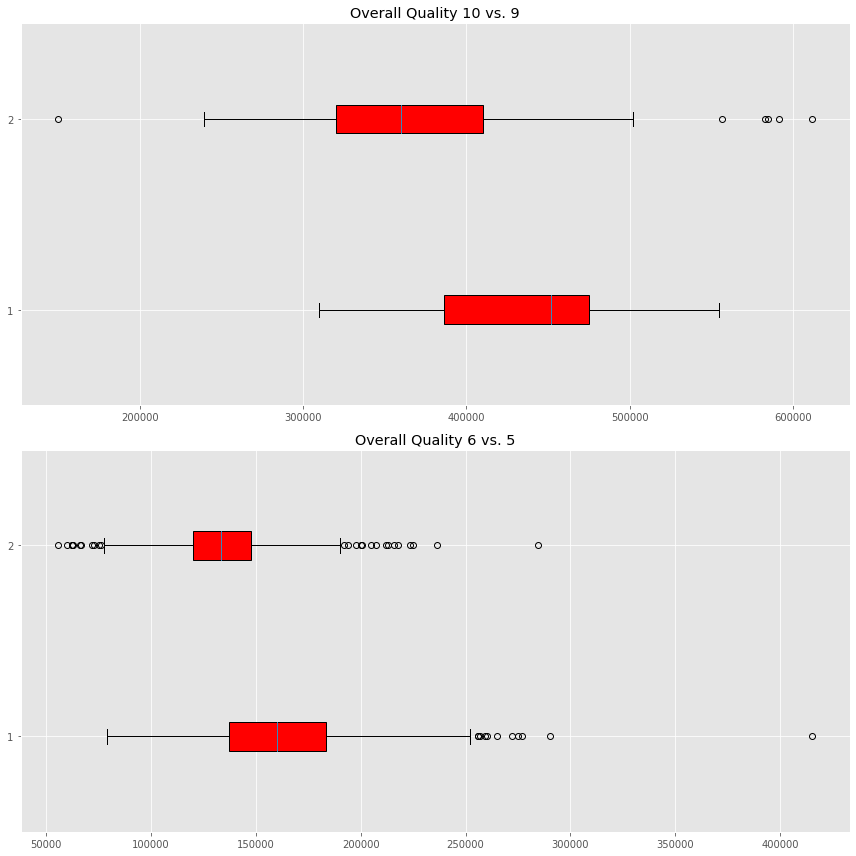

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
plt.hold = True

ax[0].boxplot(
    [
     list(train[train['Overall Qual'] == 10]['SalePrice']), 
     list(train[train['Overall Qual'] == 9]['SalePrice'])
    ],
    vert = 0,
    patch_artist = True,
    boxprops=dict(facecolor = 'red', color = 'black')
)
ax[0].set_title('Overall Quality 10 vs. 9')

ax[1].boxplot(
    [
     list(train[train['Overall Qual'] == 6]['SalePrice']), 
     list(train[train['Overall Qual'] == 5]['SalePrice'])
    ],
    vert = 0,
    patch_artist = True,
    boxprops=dict(facecolor = 'red', color = 'black')
)
ax[1].set_title('Overall Quality 6 vs. 5')

plt.tight_layout();
plt.savefig('../plots/box.png');

In [52]:
print(train[train['Overall Qual'] == 10]['SalePrice'].median() - train[train['Overall Qual'] == 9]['SalePrice'].median())
print(train[train['Overall Qual'] == 6]['SalePrice'].median() - train[train['Overall Qual'] == 5]['SalePrice'].median())

92050.0
26500.0


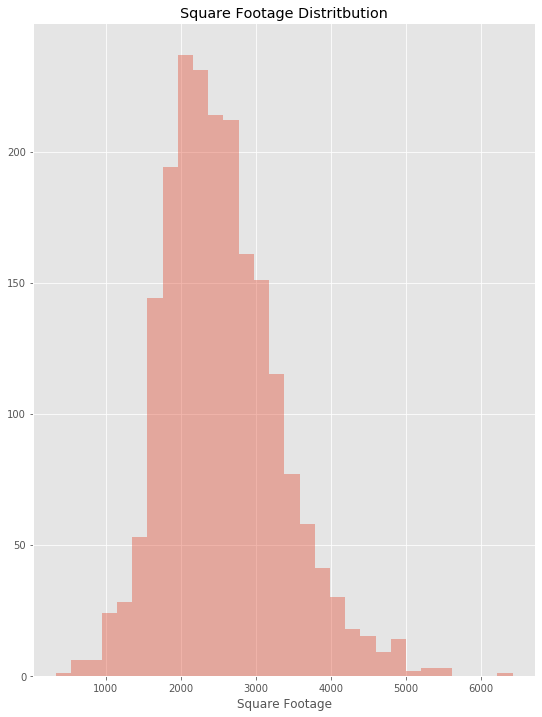

In [53]:
plt.figure(figsize = (9,12))
sns.distplot(train['all_flrs_SF'], bins = 30, kde = False)
plt.title('Square Footage Distritbution')
plt.xlabel('Square Footage');

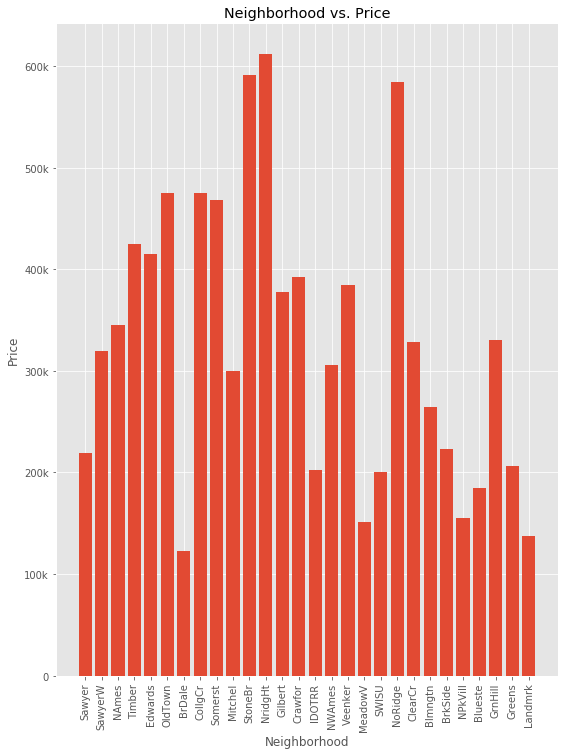

In [54]:
plt.figure(figsize = (9, 12))
plt.bar(train['Neighborhood'], train['SalePrice'])
plt.title('Neighborhood vs. Price')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.yticks([0, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000], 
            ['0', '100k', '200k', '300k', '400k', '500k', '600k'])
plt.xticks(rotation = 'vertical');

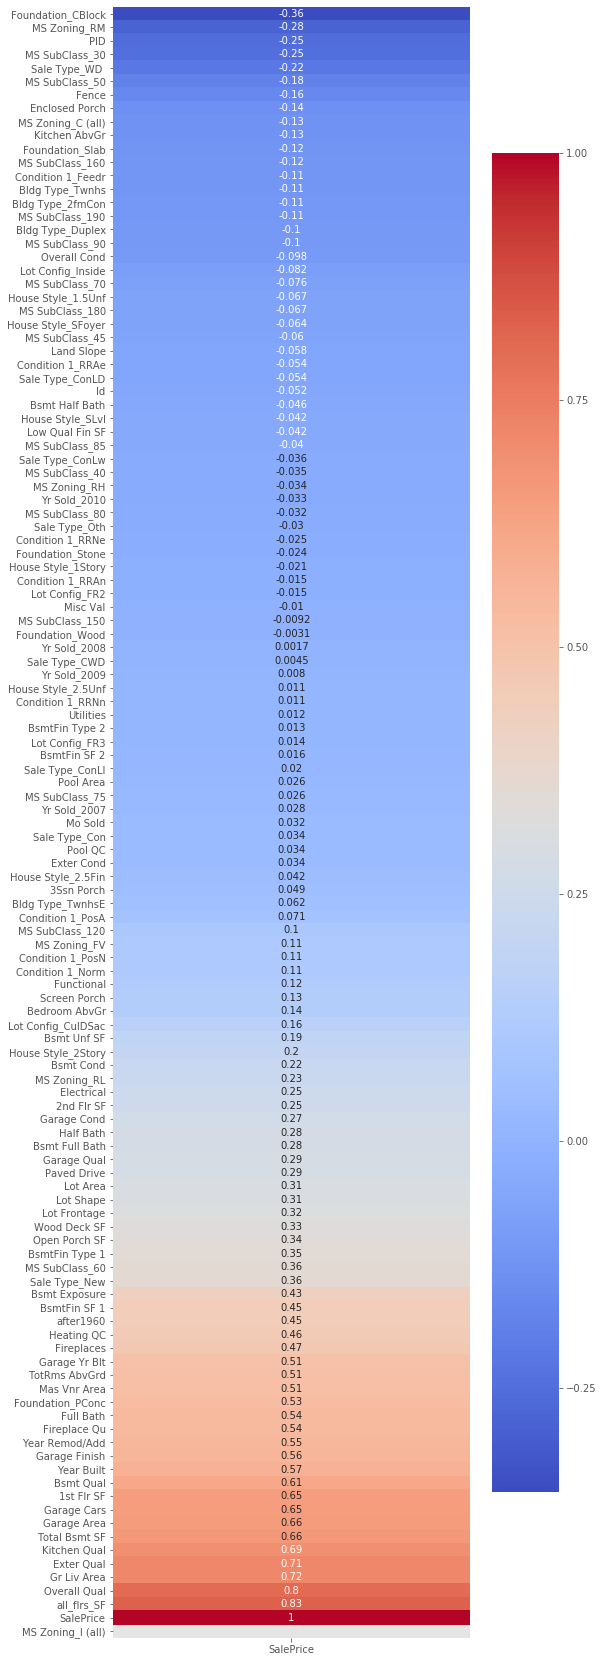

In [55]:
plt.figure(figsize = (8,30))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = True), annot = True, cmap = 'coolwarm');

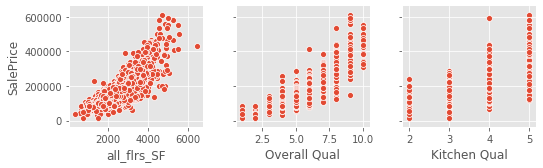

In [56]:
sns.pairplot(train, y_vars = ['SalePrice'], x_vars = ['all_flrs_SF', 'Overall Qual', 'Kitchen Qual']);

## Model

In [57]:
model = LinearRegression()

### Polynomial Features

In [58]:
numeric_train = train._get_numeric_data()

In [59]:
numeric_train = numeric_train.drop(['Id', 'PID'], axis=1)

In [60]:
X = numeric_train.drop(columns = 'SalePrice')
y = numeric_train['SalePrice']

In [61]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)

In [62]:
# Create X_poly
X_poly = poly.fit_transform(X)

In [63]:
#View polynomial features in a DF
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(X.columns), index=X.index)

In [64]:
#Cross val score with poly
#cross_val_score(model, X_poly, y, cv = 5).mean()

In [65]:
def clean_zero_features(df, threshold=0.25):
    
    idx = (df == 0).mean() < threshold
    
    return df[idx[idx].index]

In [66]:
X_poly_df = clean_zero_features(X_poly_df)

### Train test split function

In [67]:
def tts(X, y, random = 2, log = False):
    ttsvals = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random)
    model.fit(X_train, y_train)
    if log:
        preds = np.exp(model.predict(X_test))
        ttsvals['R2'] = r2_score(np.exp(y_test),preds)
    else:
        preds = model.predict(X_test)
        ttsvals['R2'] = r2_score(y_test, preds)
    ttsvals['train score'] = model.score(X_train, y_train)
    ttsvals['cross val score'] = cross_val_score(model, X_train, y_train, cv = 5)
    ttsvals['coef'] = model.coef_
    return ttsvals

In [68]:
#All numeric cols !!!
print('Test: ',tts(X, y)['R2'])
print('CVS: ', tts(X, y)['cross val score'])

Test:  0.8885707442648305
CVS:  [0.8700218  0.90716041 0.84451979 0.88867972 0.90591712]


### Auto select features

In [69]:
#Select K best correlations from poly

df = X_poly_df.copy().drop('Utilities Overall Qual', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 2)

feature_selector = SelectKBest(f_regression, k=140)
feature_selector.fit(X_train, y_train)
X_train_new = feature_selector.transform(X_train)
X_test_new = feature_selector.transform(X_test)

model = LinearRegression().fit(X_train_new, y_train)
preds = model.predict(X_test_new)
print('R2: ',r2_score(y_test, preds))

R2:  0.8828597382620673


In [70]:
def get_top_poly_cols(df, c = .84):
    top_poly_cols = []
    for col in df.columns:
        if df[col].corr(y) > c:
            top_poly_cols.append(col)
    return top_poly_cols

In [71]:
#Top poly cols
df = X_poly_df[get_top_poly_cols(X_poly_df)]
print(tts(df, y)['R2'])
tts(df, y)['cross val score']

0.8558193398833145


array([0.82917663, 0.90649068, 0.83009437, 0.88951844, 0.87441178])

In [72]:
### Best sub: All numeric cols vs logY plus best from top poly cols ###
### best 3 from top poly cols are over .9, which is the coefficient we pass to get_top_poly_cols

df = pd.concat([X, X_poly_df[get_top_poly_cols(X_poly_df,.9)]], axis=1)
logy = np.log(y)
print('Best R2: ',tts(df, logy, log = True)['R2'])

Best R2:  0.9338668674631714


In [73]:
#No overblown coefficients
tts(df, logy, log = True)['coef'].max(), tts(df, logy, log = True)['coef'].min()

(0.6230759018085462, -0.1928289145254816)

### Standard Scaler

In [74]:
df = X.copy()

X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 2)

ss = StandardScaler().fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

model.fit(X_train, y_train)
unscaledpreds = model.predict(X_test)

#print('Unscaled: ',r2_score(unscaledpreds, y_test))
print('Unscaled')
print('Train, Test: ', model.score(X_train, y_train), model.score(X_test, y_test))
print()

model.fit(X_train_scaled,y_train)
scaledpreds = model.predict(X_test_scaled)

#print('Scaled: ',r2_score(scaledpreds, y_test))
print('Scaled')
print('Train, Test: ', model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

Unscaled
Train, Test:  0.9096710490584964 0.8885707442648305

Scaled
Train, Test:  0.9096729197369775 0.8885834195729848


### Ridge

In [75]:
ridge = Ridge(alpha = 19)
ridge.fit(X_train_scaled, y_train)
print('Ridge')
print('Train, Test: ',ridge.score(X_train_scaled, y_train), ridge.score(X_test_scaled, y_test))

Ridge
Train, Test:  0.9094848489484166 0.8887410557534658


In [76]:
ridge_alphas = np.logspace(0, 10, 118)
ridge_cv = RidgeCV(
    alphas = ridge_alphas,
    scoring = 'r2'
)
# Fit model using best ridge alpha!
ridge_cv.fit(X_train_scaled, y_train)
print('Ridge CV')
print('alpha: ',ridge_cv.alpha_)
print('Train, Test: ',ridge_cv.score(X_train_scaled, y_train), ridge_cv.score(X_test_scaled, y_test))

Ridge CV
alpha:  19.144819761699587
Train, Test:  0.9094831733205639 0.8887414780425783


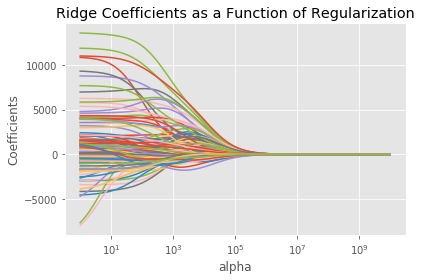

In [77]:
#for each alpha, append value of coefficient to list for that coefficient
ridge_alphas = np.logspace(0, 10, 118)

coefs = []
for i in range(118):
    coefs.append([])

for a in ridge_alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train_scaled, y_train)
    j = 0
    for coef in ridge.coef_:
        coefs[j].append(coef)
        j += 1
        
for coef in coefs:
    plt.plot(ridge_alphas, coef)
    
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Regularization')
plt.tight_layout()
plt.savefig('../plots/ridge.png');

### Lasso

In [78]:
lasso = Lasso(alpha = 13)
lasso.fit(X_train_scaled, y_train)
print('Lasso')
print('Train, Test: ',lasso.score(X_train_scaled, y_train), lasso.score(X_test_scaled, y_test))

Lasso
Train, Test:  0.9096169602140384 0.8886508686592605


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6746018285.654175, tolerance: 980103864.464884
  positive)


In [79]:
lasso_alphas = np.logspace(-2, 2, 10)

lasso_cv = LassoCV(
    alphas = lasso_alphas,
    cv = 5,
    max_iter = 50_000,
    normalize = True
)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_scaled, y_train)
print('Lasso CV')
print('alpha: ',lasso_cv.alpha_)
print('Train, Test: ',lasso_cv.score(X_train_scaled, y_train), lasso_cv.score(X_test_scaled, y_test))

Lasso CV
alpha:  12.915496650148826
Train, Test:  0.9052011697695215 0.8897434694649461


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161357604116.46265, tolerance: 980103864.464884
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161454714034.3954, tolerance: 980103864.464884
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161566540422.53418, tolerance: 980103864.464884
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

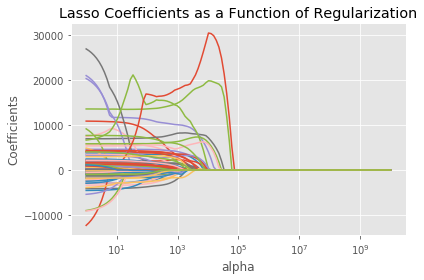

In [80]:
#for each alpha, append value of coefficient to list for that coefficient
lasso_alphas = np.logspace(0, 10, 118)

coefs = []
for i in range(118):
    coefs.append([])

for a in lasso_alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train_scaled, y_train)
    j = 0
    for coef in lasso.coef_:
        coefs[j].append(coef)
        j += 1
        
for coef in coefs:
    plt.plot(lasso_alphas, coef)

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of Regularization')
plt.tight_layout()
plt.savefig('../plots/lasso.png');

### Evaluate Model

In [81]:
def get_metrics(model,X,y):
    metrics_dict = {}
    
    preds = model.predict(X)
    errors = y - preds
    metrics_dict['mae'] = metrics.mean_absolute_error(y, preds) #np.mean(np.abs(errors))
    metrics_dict['sse'] = sum(errors ** 2)
    metrics_dict['mse'] = metrics.mean_squared_error(y, preds) #sse / len(y)
    metrics_dict['rmse'] = np.sqrt(metrics.mean_squared_error(y, preds)) #np.sqrt(np.mean((errors)**2))
    metrics_dict['r2'] = metrics.r2_score(y, preds)
    metrics_dict['r2_adj'] = r2_adj(model,X,y)
    return metrics_dict

In [82]:
def r2_adj(model,X,y):
    pred = model.predict(X)
    r2 = model.score(X,y)
    n = len(y)
    k = len(X.columns)
    return 1 - ( ((1 - r2)*(n - 1)) / (n - k - 1) )

In [83]:
get_metrics(model,X,y)

{'mae': 1.6965167787579347e+19,
 'sse': 6.5116367867499674e+41,
 'mse': 3.179510149780257e+38,
 'rmse': 1.7831180975415669e+19,
 'r2': -5.062633665090178e+28,
 'r2_adj': -5.372323023556037e+28}

In [84]:
model.score(X,y)

-5.062633665090178e+28

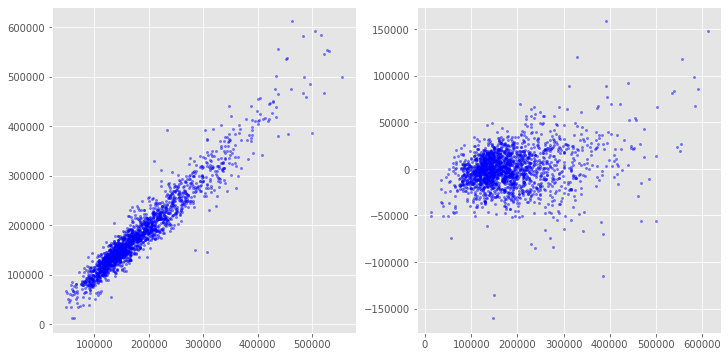

In [85]:
#Poly chart
df = X_poly_df[get_top_poly_cols(X_poly_df, .67)].drop('Utilities Overall Qual', axis = 1)

model.fit(df, y)
predz = model.predict(df)
residuals = y - predz

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(predz, y, s=5, color='b', alpha=0.5)
ax[1].scatter(y, residuals, s=5, color='b', alpha=0.5)

#### No nonlinearities:

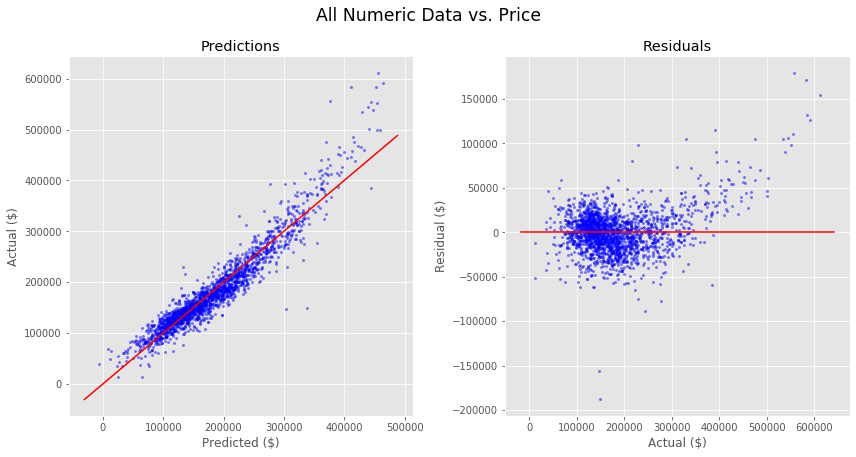

In [86]:
# df = pd.concat([X, X_poly_df[['Overall Qual all_flrs_SF', 'Exter Qual all_flrs_SF']]], axis=1)
df = X.copy()

model = LinearRegression().fit(df, y)
preds = model.predict(df)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('All Numeric Data vs. Price', fontsize = 'xx-large', y = 1.05)
plt.subplots_adjust(top=0.85)

ax[0].scatter(preds, y, s=5, color='b', alpha=0.5)
xlim = ax[0].get_xlim()
ax[0].plot(xlim, xlim, color='r')
ax[0].set_xlabel('Predicted ($)')
ax[0].set_ylabel('Actual ($)')
ax[0].set_title('Predictions')

residuals = y - preds
ax[1].scatter(y, residuals, s=5, color='b', alpha=0.5)
xlim = ax[1].get_xlim()
ax[1].plot(xlim, [0, 0], color='r')
ax[1].set_xlabel('Actual ($)')
ax[1].set_ylabel('Residual ($)')
ax[1].set_title('Residuals')

plt.tight_layout()
plt.savefig('../plots/allnumeric.png')

#### With nonlinearities:
1) model log(price) and exponentiate predictions  
2) (optional) add in some interaction features that are highly correlated with price

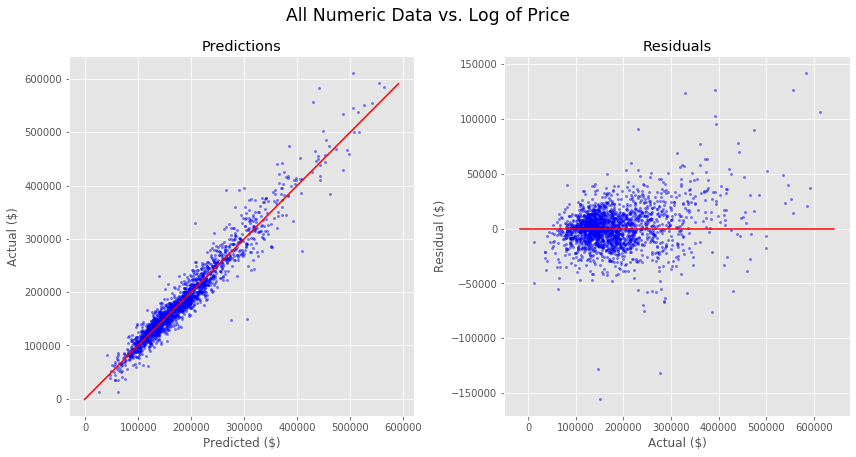

In [87]:
# df = pd.concat([X, X_poly_df[['Overall Qual all_flrs_SF', 'Exter Qual all_flrs_SF']]], axis=1)
df = X.copy()

model = LinearRegression().fit(df, np.log(y))
preds = np.exp(model.predict(df))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('All Numeric Data vs. Log of Price', fontsize = 'xx-large', y = 1.05)

ax[0].scatter(preds, y, s=5, alpha = .5, color = 'b')
xlim = ax[0].get_xlim()
ax[0].plot(xlim, xlim, color='r')
ax[0].set_xlabel('Predicted ($)')
ax[0].set_ylabel('Actual ($)')
ax[0].set_title('Predictions')

residuals = y - preds
ax[1].scatter(y, residuals, s=5, color = 'b', alpha = .5)
xlim = ax[1].get_xlim()
ax[1].plot(xlim, [0, 0], color='r')
ax[1].set_xlabel('Actual ($)')
ax[1].set_ylabel('Residual ($)')
ax[1].set_title('Residuals')


plt.savefig('../plots/log.png')
plt.tight_layout();

In [88]:
# preds = model.predict(X_poly)
preds = np.exp(model.predict(X))

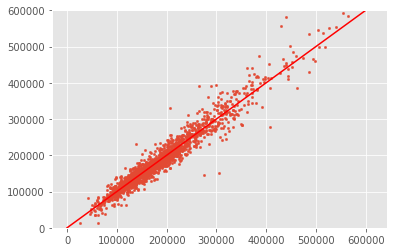

In [89]:
plt.scatter(preds, y, s = 5, alpha = 1)
plt.ylim(0,600_000)

m, b = line_of_best_fit(preds,y)
plt.plot([0, np.max(y)],
        [0,np.max(y)],
        color = 'red');

## Output

In [90]:
Xtest = test.copy()

numeric_test = Xtest._get_numeric_data()
numeric_test = numeric_test.drop(['Id', 'PID'], axis=1)
#Xtest = numeric_test.drop(columns = 'SalePrice')

# Create testpoly
test_poly = poly.fit_transform(numeric_test)

#View polynomial features in a DF
test_poly_df = pd.DataFrame(test_poly, columns=poly.get_feature_names(numeric_test.columns), index=numeric_test.index)

#didn't clean zero features

In [91]:
poly_cols = get_top_poly_cols(X_poly_df, .9)

T1 = pd.concat([Xtest, test_poly_df[poly_cols]], axis=1)

X1 = pd.concat([X, X_poly_df[poly_cols]], axis=1)

In [92]:
missing = X1.columns[~X1.columns.isin(T1.columns)]
for column in missing:
    T1[column] = 0  # only makes sense for one-hot encoded variables
    
T1 = T1[X1.columns]

# retrain model

model = LinearRegression().fit(X1, np.log(y))
testpredictions = np.exp(model.predict(T1))

In [93]:
#best CVS
cross_val_score(model, X1, y, cv = 5).mean()

0.9223431184235981

In [94]:
output = pd.DataFrame({'Id': test['Id']})

In [95]:
output['SalePrice'] = testpredictions

In [96]:
output.head()

,Id,SalePrice
0,2658,147625.743875
1,2718,157284.972772
2,2414,216813.178674
3,1989,98724.052141
4,625,167652.917886


In [97]:
output.to_csv('../submissions/submission_bad.csv', index=False)